In [1]:
import pandas as pd
df = pd.read_csv("spam_ham_dataset.csv")
df.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
df = df.drop("label",axis="columns")

In [6]:
df.head(5)

,Unnamed: 0,text,label_num
0,605,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,"Subject: photoshop , windows , office . cheap ...",1
4,2030,Subject: re : indian springs\r\nthis deal is t...,0


In [7]:
target = df["label_num"]

In [8]:
df = df.drop(["Unnamed: 0", "label_num"],axis="columns")

In [9]:
df.head(5)

,text
0,Subject: enron methanol ; meter # : 988291\r\n...
1,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,"Subject: photoshop , windows , office . cheap ..."
4,Subject: re : indian springs\r\nthis deal is t...


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df["text"],target,test_size = 0.2)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train)
X_train_count.toarray()

array([[ 0,  0,  0, ...,  0,  0,  0],
       [35,  0,  0, ...,  0,  0,  0],
       [ 0,  5,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [39]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,Y_train)

MultinomialNB()

In [40]:
t = v.transform(X_test)
model.score(t,Y_test)

0.9748792270531401

In [48]:
emails = [
    "Hi this is Hamza and I want to talk to you",
    "I have job with 50% off, exculsive offer, money and more money"
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [49]:
y_pred = model.predict(v.transform(X_test))

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred, labels=[0,1])

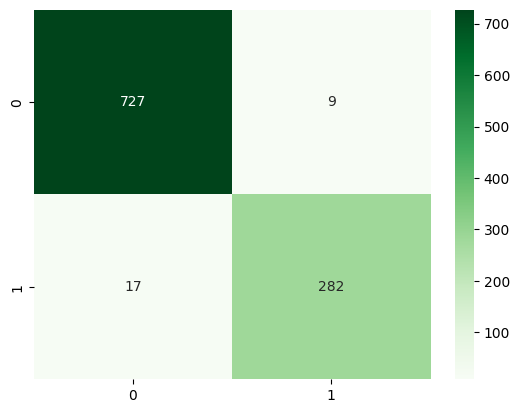

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, cmap = "Greens", annot = True, fmt = "d")
plt.show()

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.9748792270531401

In [61]:
def pre(emails, model):
    emails_count = v.transform(emails)
    pred = model.predict(emails_count)
    if pred == 1:
        print("SPAM")
    else:
        print("HAM")

pre(["This is just an information letter"], model)
pre(["Hi there how are you?"], model)
pre(["This is 50% off, exculive offer, free money money money"], model)

HAM
HAM
SPAM
